In [1]:
from virusPropagationModel import *
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
modeledWorld1 = ModeledPopulatedWorld(1000,10, world_from_file=True, geofile_name='datafiles/Buildings_Gangelt_MA_3.csv', agent_agent_infection=True, input_schedules='schedules_v1')
print('Number of agents: '+ str(modeledWorld1.number_of_people))
print('Distribution of initialized locations: ' + str(modeledWorld1.get_distribution_of_location_types()))

Number of agents: 1016
Distribution of initialized locations: {'hospital': 1, 'morgue': 1, 'work': 52, 'public': 11, 'school': 2, 'home': 496}


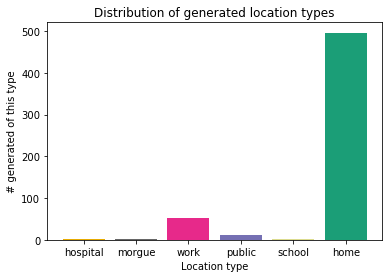

In [3]:
modeledWorld1.plot_distribution_of_location_types()

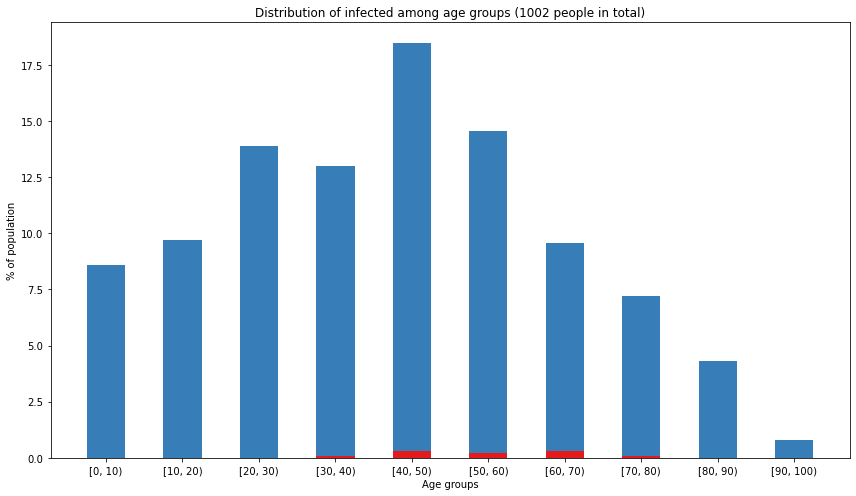

In [15]:
modeledWorld1.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

In [4]:
simulation1 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})

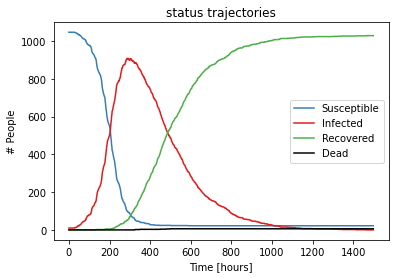

In [5]:
simulation1.simulate()
simulation1.plot_status_timecourse()

In [39]:
sim_015=load_simulation_object('R_GangeltSimulation_Infectivity015')
sim_03=load_simulation_object('R_GangeltSimulation_03')

In [8]:
import os
sim_files = os.listdir('saved_objects/')

In [3]:
x, mean,std,nr = sim_03.get_r_eff_timecourse(96)

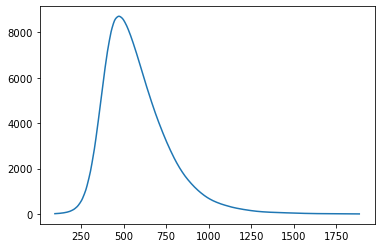

In [6]:
plt.plot(x,nr/96)

In [9]:
import os
sim_files = os.listdir('saved_objects/')


R_files =[file for file in sim_files if file.startswith('R')]

for R_file in R_files:
    print(R_file)
    sim=load_simulation_object(R_file[:-4])
    #sim.plot_status_timecourse()
    x, mean,std,nr = sim.get_r_eff_timecourse(96)
    df = pd.DataFrame(index=x, data={'mean': mean, 'std': std, 'nr': nr})
    df.to_csv(R_file[:-4]+'.csv')
    del(sim)
    
    
csv_files = [file for file in os.listdir() if file.startswith('R') and  file.endswith('.csv')]
fig, ax = plt.subplots(1,1, figsize=(6,4))
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df.drop('Unnamed: 0',axis=1, inplace=True)
    df['CV']=df['nr']*df['mean']
    df.plot(y='mean', ax=ax, label=csv_file)
    
plt.legend(loc=(1.1,0))     

R_GangeltSimulation_CloseAll200ReopenSchool500.pkl
R_GangeltSimulation_CloseAll200ReopenWork500.pkl
R_GangeltSimulation_Infectivity015.pkl
R_GangeltSimulation_CloseAll200_1.pkl
R_GangeltSimulation_CloseAll200ReopenPublic500.pkl
R_GangeltSimulation_CloseAll200ReopenAll500.pkl
R_GangeltSimulation_03.pkl


####

In [14]:
sim_03=load_simulation_object('R_GangeltSimulation_CloseAll200_1')

In [15]:
tc = sim_03.simulation_timecourse

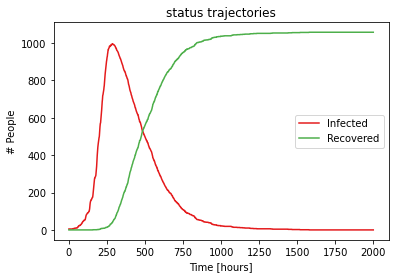

In [23]:
sim_03.plot_status_timecourse(specific_statuses=['I','R'])

In [26]:
tc[tc['Infection_event']==1].iloc[-1]
#tc[tc['status']==1].iloc[-1]


time                    485
h_ID                   8697
loc                    4275
status                    1
Temporary_Flags           1
Cumulative_Flags          1
Interaction_partner    8699
Infection_event           1
Name: 4974662, dtype: int64

In [20]:
df = pd.read_csv(csv_files[0])
print(csv_files[0])
df

R_GangeltSimulation_CloseAll200_1.csv


,Unnamed: 0,mean,std
0,96,5.289058,2.866977
1,97,5.250616,2.853045
2,98,5.212830,2.838953
3,99,5.176093,2.823557
4,100,5.141317,2.808462
...,...,...,...
1477,1573,2.594203,0.917293
1478,1574,2.583942,0.912675
1479,1575,2.573529,0.907845
1480,1576,2.562963,0.902793


In [ ]:
['Lockdown', 'Lockdown, Reopen Public','Lockdown, Reopen All',  'Lockdown, Reopen All']

In [ ]:
def get_initially_infected(tc):
    return list(tc[(tc['status']==1)&(tc['time']==0)]['h_ID'].unique())

def get_secondary_infections(h_id, tc,initial_infected):
    #print(h_id)
    r_inter = len(tc[(tc['Infection_event']==1)&((tc['h_ID']==h_id)|(tc['Interaction_partner']==h_id))])
    if h_id not in not initial_infected:
        r_inter -=1
    return r_inter   
           
def get_infected_in_window(tc,t,window):
    infected_list = list(tc[(tc['status']==1)&(tc['time']<=t)&(tc['time']>t-window)]['h_ID'].unique())
    return infected_list

def calculate_R(tc,t,window, initial_infected):
    infected_list = get_infected_in_window(tc,t,window)
    return np.mean([get_secondary_infections(h_id,tc, initial_infected) for h_id in infected_list])

def get_R_t(tc,window, initial_infected):
    initial_infected = get_initially_infected(tc)
    R_tc=[]
    max_time = tc[tc['Infection_event']==1].iloc[-1]['time']
    times = np.arange(window+1,max_time,1)
    for time_step in times:
        R_tc.append(calculate_R(tc,time_step,window))
    return times, R_tc

    
    

In [46]:
tc = sim_03.simulation_timecourse
get_infected_in_window(tc,900,50)

[2143,
 335,
 5122,
 4540,
 3004,
 9843,
 116,
 6783,
 2775,
 3350,
 8162,
 9743,
 1460,
 1428,
 6280,
 9751,
 9831,
 2936,
 8146,
 709,
 8652,
 3079,
 5254,
 7050,
 5253,
 9322,
 1450,
 3370,
 872,
 2212,
 8592,
 3066,
 4724,
 10048,
 2394,
 8551,
 5411,
 1643,
 3467,
 1070,
 1071,
 5442,
 342,
 4101,
 2078,
 9687,
 9970,
 3141,
 4184,
 5923,
 9277,
 831,
 17,
 8316,
 4060,
 3447,
 2522,
 6016,
 6384,
 4067,
 4139,
 9597,
 3719,
 6842,
 2671,
 9062,
 2646,
 2660,
 3787,
 6563,
 6613,
 9189,
 4825,
 4823,
 3144,
 9931,
 10117,
 6559,
 2753,
 2756,
 2014,
 7464,
 2547,
 5471,
 5470,
 5453,
 8161,
 5490,
 5820,
 1770,
 9256,
 5882,
 5825,
 9777,
 9766,
 9257,
 5841,
 1230,
 9759,
 2843,
 4985,
 1846,
 2807,
 4960,
 2148,
 587,
 9546,
 9632,
 8675,
 2572,
 266,
 7355,
 895,
 3691,
 354,
 7267,
 353,
 5550,
 3052,
 7362,
 7371,
 2616,
 2617,
 5169,
 318,
 9623,
 5779,
 7536,
 6927,
 10246,
 7553,
 5813,
 8534,
 8531,
 7552,
 4987,
 9506,
 4559,
 591,
 983,
 2164,
 8134,
 8132,
 984,
 994,


In [55]:
t, R = get_R_t(tc,96)

KeyboardInterrupt: 

In [60]:
csv_files

['R_GangeltSimulation_CloseAll200_1.csv',
 'R_GangeltSimulation_CloseAll200ReopenPublic500.csv',
 'R_GangeltSimulation_CloseAll200ReopenAll500.csv',
 'R_GangeltSimulation_03.csv',
 'R_GangeltSimulation_Infectivity015.csv',
 'R_GangeltSimulation_CloseAll200ReopenSchool500.csv',
 'R_GangeltSimulation_CloseAll200ReopenWork500.csv']

In [61]:
def get_min_max_dict(R_files):
    min_max_dict={}
    for R_file in R_files:
        print(R_file)
        sim=load_simulation_object(R_file[:-4])
        tc = sim.simulation_timecourse
        min_t = tc[tc['Infection_event']==1].iloc[0]['time']
        max_t = tc[tc['Infection_event']==1].iloc[-1]['time']
        min_max_dict[R_file[:-4]]=(min_t,max_t)
    return min_max_dict      

In [ ]:
min_max_dict = get_min_max_dict(R_files)

In [85]:
df[(df.index.values>min_max_dict[csv_file[:-4]][0])&(df.index.values<min_max_dict[csv_file[:-4]][1])]

,mean,std,nr
28,4.891026,2.740819,3276.0
29,4.857440,2.729516,3367.0
30,4.824516,2.718767,3459.0
31,4.793298,2.708166,3551.0
32,4.764141,2.697940,3642.0
...,...,...,...
1209,0.688131,1.089322,119345.0
1210,0.687961,1.089255,118671.0
1211,0.687760,1.089162,117999.0
1212,0.687546,1.089084,117323.0


In [111]:
csv_files_lockdown =['R_GangeltSimulation_CloseAll200_1.csv',
                     'R_GangeltSimulation_CloseAll200ReopenAll500.csv',
                     'R_GangeltSimulation_CloseAll200ReopenPublic500.csv',
                     'R_GangeltSimulation_CloseAll200ReopenSchool500.csv',
                     'R_GangeltSimulation_CloseAll200ReopenWork500.csv']
csv_files_infectivity = ['R_GangeltSimulation_03.csv',
                        'R_GangeltSimulation_Infectivity015.csv']

In [112]:
names =['Lockdown',
        'Lockdown, Reopen All',
        'Lockdown, Reopen Public',
        'Lockdown, Reopen School',
        'Lockdown, Reopen Work',
        'Infectivity 0.3',
        'Infectivity 0.15',]

In [113]:
labels_dict = dict(zip(csv_files_lockdown+csv_files_infectivity,names))

In [114]:
labels_dict

{'R_GangeltSimulation_CloseAll200_1.csv': 'Lockdown',
 'R_GangeltSimulation_CloseAll200ReopenAll500.csv': 'Lockdown, Reopen All',
 'R_GangeltSimulation_CloseAll200ReopenPublic500.csv': 'Lockdown, Reopen Public',
 'R_GangeltSimulation_CloseAll200ReopenSchool500.csv': 'Lockdown, Reopen School',
 'R_GangeltSimulation_CloseAll200ReopenWork500.csv': 'Lockdown, Reopen Work',
 'R_GangeltSimulation_03.csv': 'Infectivity 0.3',
 'R_GangeltSimulation_Infectivity015.csv': 'Infectivity 0.15'}

R_GangeltSimulation_03.csv mean         0.706668
std          1.186502
nr      222362.000000
Name: 711, dtype: float64
R_GangeltSimulation_Infectivity015.csv mean        0.657497
std         0.952100
nr      79611.000000
Name: 1035, dtype: float64
R_GangeltSimulation_CloseAll200_1.csv mean        0.720193
std         1.250644
nr      41836.000000
Name: 484, dtype: float64
R_GangeltSimulation_CloseAll200ReopenAll500.csv mean         0.724260
std          1.241248
nr      104943.000000
Name: 1112, dtype: float64
R_GangeltSimulation_CloseAll200ReopenPublic500.csv mean        0.676707
std         0.947636
nr      67892.000000
Name: 1335, dtype: float64
R_GangeltSimulation_CloseAll200ReopenSchool500.csv mean        0.652342
std         1.123485
nr      65271.000000
Name: 1186, dtype: float64
R_GangeltSimulation_CloseAll200ReopenWork500.csv mean         0.687361
std          1.089036
nr      116652.000000
Name: 1213, dtype: float64


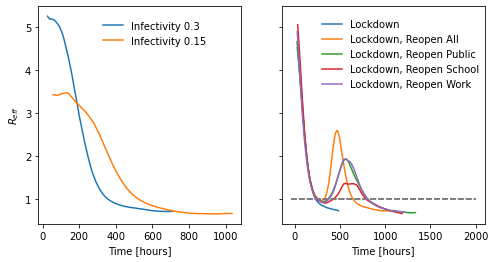

In [129]:
csv_files = [file for file in os.listdir() if file.startswith('R') and  file.endswith('.csv')]
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey=True )

ax =axes[0]
for csv_file in csv_files_infectivity:
    df = pd.read_csv(csv_file)
    df.drop('Unnamed: 0',axis=1, inplace=True)
    df_crop = df[(df.index.values>min_max_dict[csv_file[:-4]][0])&(df.index.values<min_max_dict[csv_file[:-4]][1])]
    df_crop.plot(y='mean', ax=ax, label=labels_dict[csv_file])
    ax.legend(loc=(0.3,0.8), frameon=False)
    ax.set_ylabel(r'$R_{eff}$')
    ax.set_xlabel('Time [hours]')
    print(csv_file,df_crop.iloc[-1])

ax =axes[1]    
for csv_file in csv_files_lockdown:
    df = pd.read_csv(csv_file)
    ax.plot(np.linspace(-40,2000,10),[1]*10, '--',color='gray')
    df.drop('Unnamed: 0',axis=1, inplace=True)
    df_crop = df[(df.index.values>min_max_dict[csv_file[:-4]][0])&(df.index.values<min_max_dict[csv_file[:-4]][1])]
    df_crop.plot(y='mean', ax=ax, label=labels_dict[csv_file])
    ax.legend(loc=(0.18,0.6), frameon=False)
    ax.set_ylabel(r'$R_{eff}$')
    ax.set_xlabel('Time [hours]')
    print(csv_file,df_crop.iloc[-1])
#plt.savefig('R_plot.svg')    

In [30]:
x, mean,std = sim_015.get_r_eff_timecourse(96)

In [31]:
df2 = pd.DataFrame(index=x, data={'mean': mean, 'std':std})

In [33]:
df1 = pd.read_csv('R_values')

In [45]:
df_merged = pd.concat([df1, df2], axis=1)
len(df1)

1790

In [47]:
df1

,Unnamed: 0,sim_03_mean,sim_03_std
0,96,5.666399,2.189502
1,97,5.640125,2.195005
2,98,5.615209,2.199920
3,99,5.591549,2.204316
4,100,5.570087,2.207789
...,...,...,...
1785,1881,1.000000,0.000000
1786,1882,1.000000,0.000000
1787,1883,1.000000,0.000000
1788,1884,1.000000,0.000000


In [ ]:
df_merged.to_csv('R_values')

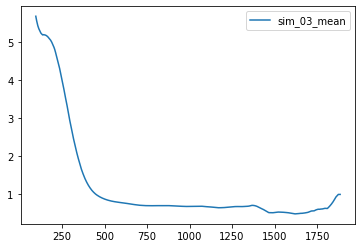

In [28]:
df_merged.plot()

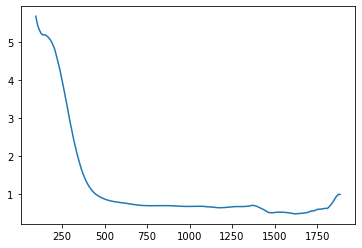

In [23]:
plt.plot(x,mean)

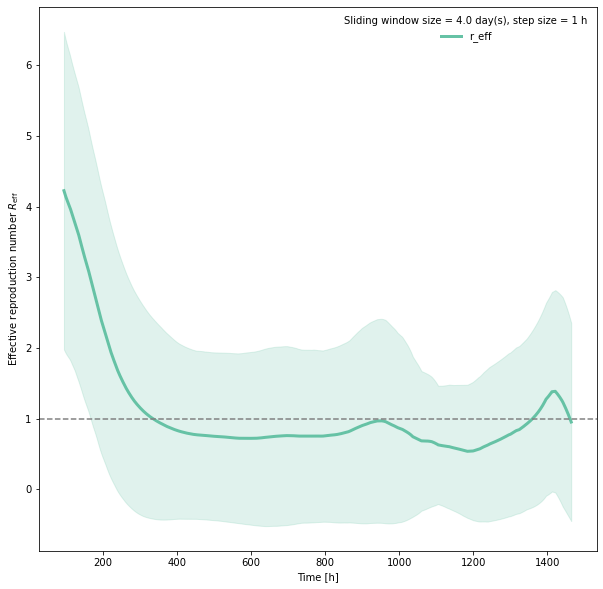

In [11]:
simulation1.plot_r_eff(96)

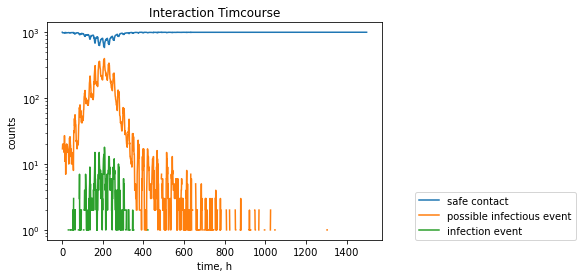

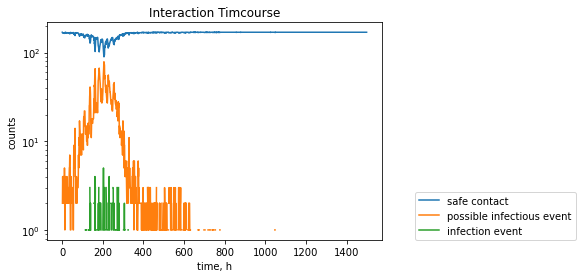

In [25]:
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=False)
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=True)  

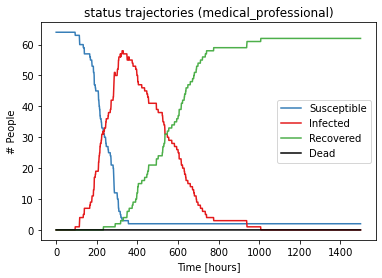

In [20]:
simulation1.plot_status_timecourse(specific_people='medical_professional')

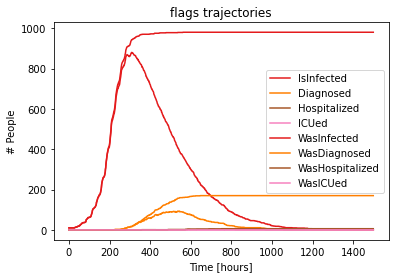

In [21]:
simulation1.plot_flags_timecourse()

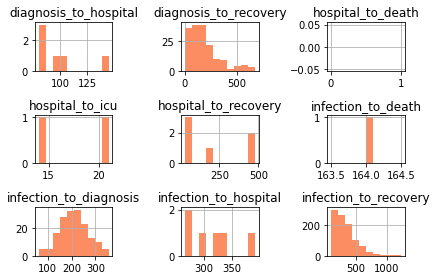

In [22]:
simulation1.plot_distributions_of_durations()

In [10]:
#simulation1.export_time_courses_as_csvs(identifier='testing') 
# Exports the CSVs to the outputs folder.
# Files marked with the identifier 'testing' get automatically deleted by the testrunner.
# Use a different identifier name if you want your outputs to remain in the folder.

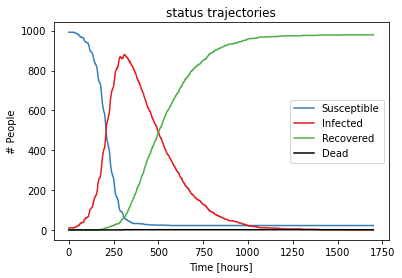

In [23]:
simulation2 = Simulation(simulation1,200) # Now Simulation class objects can be used for subsequent simulation (nested)
simulation2.plot_status_timecourse()

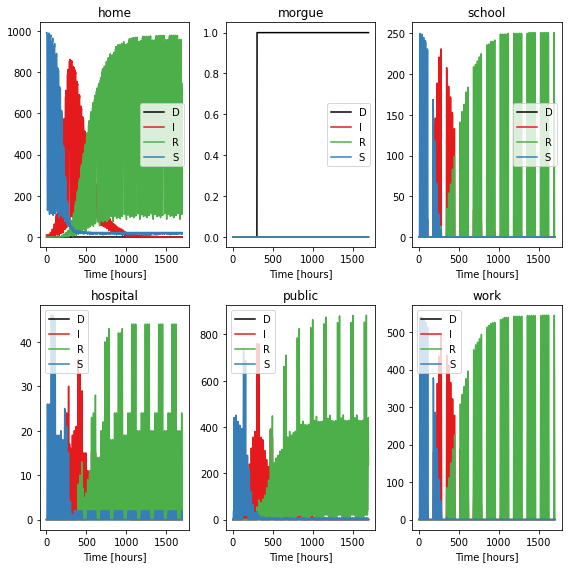

In [26]:
simulation2.plot_status_at_location()

In [13]:
#now we can save and load worlds and simulations (exported to the folder saved_objects)
#modeledWorld1.save('testingmyfirstworld')
#loadedWorld1 = load_simulation_object('testingmyfirstworld')
#simulationFromLoadedWorld1 = Simulation(loadedWorld1,100)
#simulationFromLoadedWorld1.save('testingmyfirstsimulation')
#loadedSimulation = load_simulation_object('testingmyfirstsimulation')
#loadedSimulation.plot_status_timecourse()

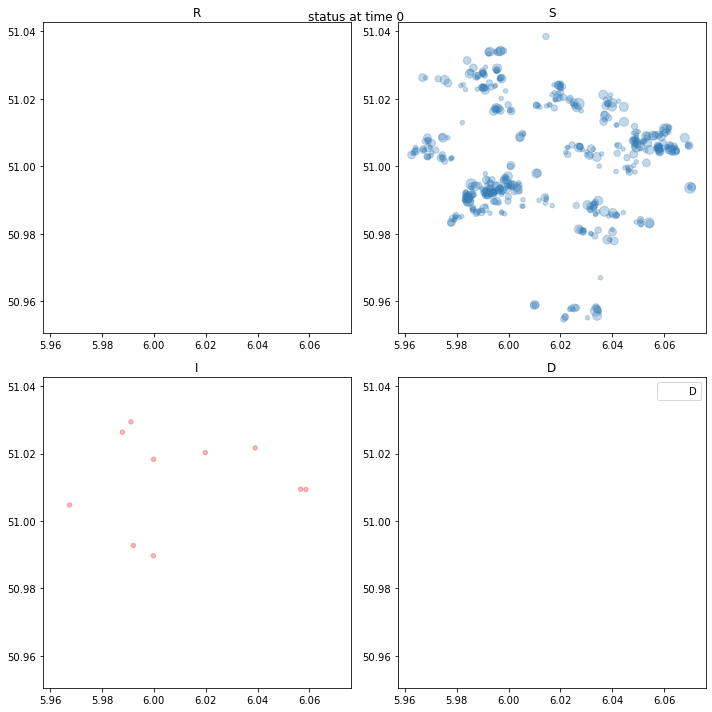

In [27]:
simulation1.map_status_at_loc(save_figure=False,time_steps=1)

In [15]:
# removes files saved in the cells in this notebook
for file in glob.glob("*/testing*"):
    os.remove(file)

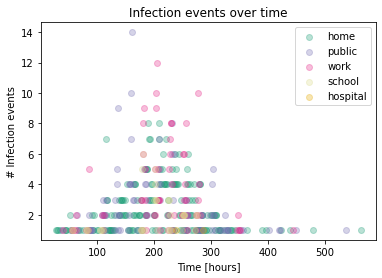

In [28]:
simulation1.plot_infections_per_location_type_over_time()

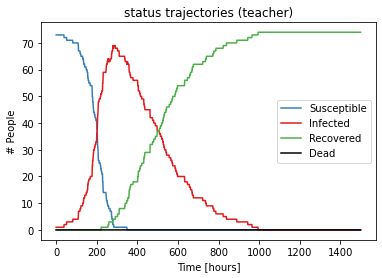

In [29]:
simulation1.plot_status_timecourse(specific_people='teacher')

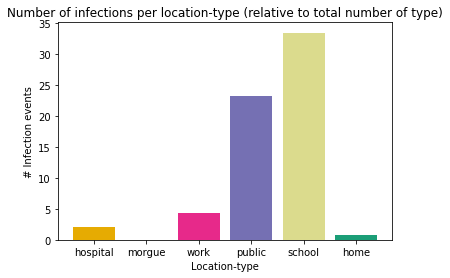

In [30]:
simulation1.plot_infections_per_location_type()

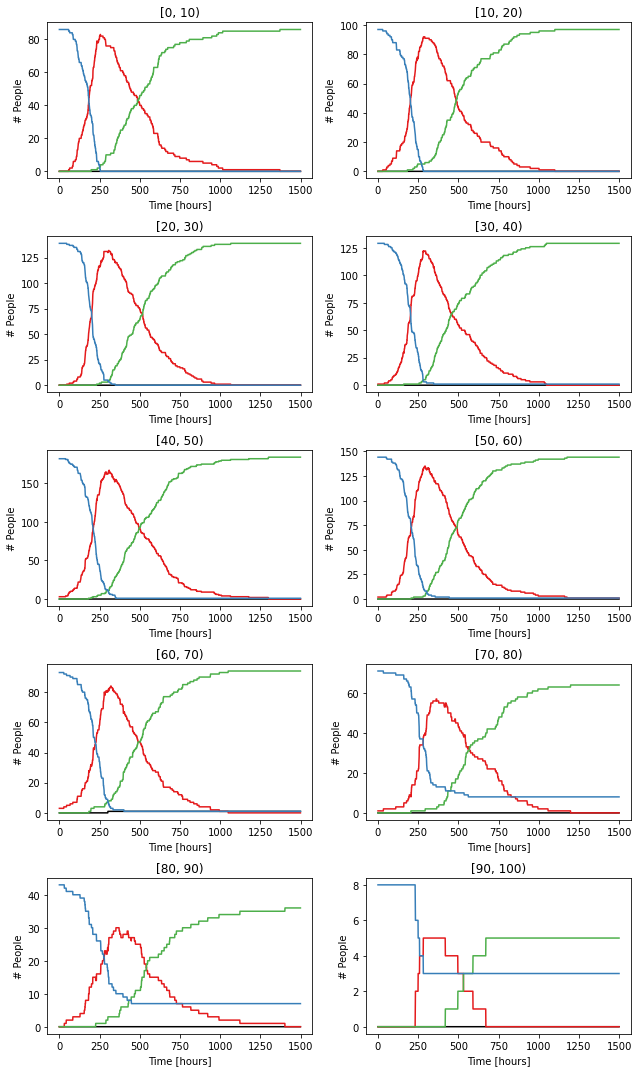

In [31]:
simulation1.plot_age_groups_status_timecourse()